In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class Robot:
    def __init__(self, x=0, y=0, theta=0, wheel_rad=0.05, wheel_dist=0.2, sensor_range=5) -> None:
        self.x = x
        self.y = y
        self.theta = theta
        self.wheel_rad  = wheel_rad
        self.wheel_dist = wheel_dist
        self.sensor_range = sensor_range
        self.sensor_angles = np.linspace(-np.pi/2, np.pi/2, 9) # total of 9 rays received by sensors

    def move(self, v_l, v_r, dt):
        v = self.wheel_rad * (v_r + v_l) / 2
        omega = self.wheel_rad * (v_r - v_l) / self.wheel_dist
        self.x += v * np.cos(self.theta) * dt
        self.y += v * np.sin(self.theta) * dt
        self.theta += omega * dt
        self.theta = (self.theta + np.pi) % (2*np.pi) - np.pi

    def sense(self, obstacles):
        distances = []
        for angle in self.sensor_angles:
            ray_angle = self.theta + angle
            min_dist = self.sensor_range
            for x,y in obstacles:
                dx = x - self.x
                dy = y - self.y
                dist = np.hypot(dx, dy)
                if dist > self.sensor_range:
                    continue
                obstacle_angle = np.arctan2(dy, dx)
                if abs(np.arctan2(np.sin(obstacle_angle - ray_angle), np.cos(obstacle_angle - ray_angle))) < np.pi/18:
                    min_dist = min(min_dist, dist)
            distances.append(min_dist)
        return dist

            

In [21]:
obsx = np.linspace(0.1, 0.5, 5)
obsy = np.linspace(0.1, 0.5, 5)
obstacles = [(x,y) for x in obsx for y in obsy]

dt = 0.1
time = 20
steps = int(time/dt)

robot = Robot()

x_path = [robot.x]
y_path = [robot.y]

In [22]:
sensor_data_collected = []

for _ in range(steps):
    robot.move(v_l=0.2, v_r=0.5, dt=dt)
    x_path.append(robot.x)
    y_path.append(robot.y)
    sensor_data = robot.sense(obstacles=obstacles)
    sensor_data_collected.append(sensor_data)


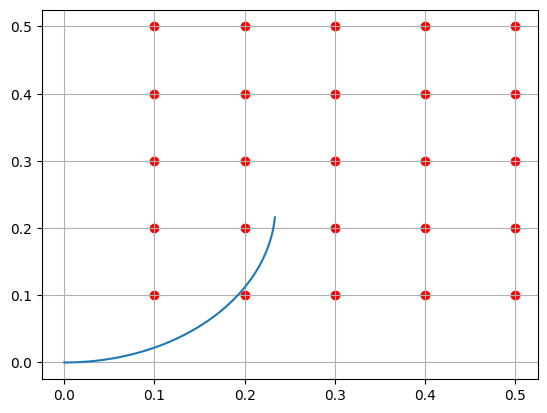

In [23]:
plt.plot(x_path, y_path, label="robot path")
ox, oy = zip(*obstacles)
plt.scatter(ox, oy, c="red", label="obstacles")
plt.grid(True)

